In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!wget https://download1320.mediafire.com/qbnz3g6suaggvlmIq8IFPFDo80GVMmQepUhuwjyB5REHwttOJd5lxfEZzR0zBgwCDv9a0EwVgtBXjXF5XYalKOn_zdojlAE08RwAGyruoTXD9vzxNG4NR94gp_UOQzQ09r07CwxckJru0DrJ9S8fE7ENEu8Rm_9yNbqIYkQEjEeD_Q/9qv28y5k4m6s78d/train_digit.csv

--2024-07-07 05:49:28--  https://download1320.mediafire.com/qbnz3g6suaggvlmIq8IFPFDo80GVMmQepUhuwjyB5REHwttOJd5lxfEZzR0zBgwCDv9a0EwVgtBXjXF5XYalKOn_zdojlAE08RwAGyruoTXD9vzxNG4NR94gp_UOQzQ09r07CwxckJru0DrJ9S8fE7ENEu8Rm_9yNbqIYkQEjEeD_Q/9qv28y5k4m6s78d/train_digit.csv
Resolving download1320.mediafire.com (download1320.mediafire.com)... 205.196.123.8
Connecting to download1320.mediafire.com (download1320.mediafire.com)|205.196.123.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.mediafire.com/download_repair.php?flag=9&dkey=qbnz3g6suaggvlmIq8IFPFDo80GVMmQepUhuwjyB5REHwttOJd5lxfEZzR0zBgwCDv9a0EwVgtBXjXF5XYalKOn%5FzdojlAE08RwAGyruoTXD9vzxNG4NR94gp%5FUOQzQ09r07CwxckJru0DrJ9S8fE7ENEu8Rm%5F9yNbqIYkQEjEeD%5FQ&qkey=9qv28y5k4m6s78d&ip=35%2E203%2E172%2E30 [following]
--2024-07-07 05:49:29--  https://www.mediafire.com/download_repair.php?flag=9&dkey=qbnz3g6suaggvlmIq8IFPFDo80GVMmQepUhuwjyB5REHwttOJd5lxfEZzR0zBgwCDv9a0EwVgtBXjXF5XYalKOn%5FzdojlAE08RwAGyruo

In [52]:
df=pd.read_csv("train_digit.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
x=df.drop('label',axis=1)
y=df['label']
print(x)
print(y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [58]:
#normalize x
x=x/255

In [55]:
print(x.shape,'\n',y.shape)

(42000, 784) 
 (42000,)


In [59]:
from keras.utils import to_categorical
y=to_categorical(y,num_classes=10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [61]:
print(df['label'].value_counts())
print("\n=============",x.shape)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

============= (42000, 784)


In [62]:
#create the neural network
from keras import models, layers
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(784,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
#add optimizers
from keras import optimizers
sgd=optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
#train the model
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 0.7883 - accuracy: 0.7960 - val_loss: 0.4074 - val_accuracy: 0.8890
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3516 - accuracy: 0.9025 - val_loss: 0.3170 - val_accuracy: 0.9092
Epoch 3/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2937 - accuracy: 0.9175 - val_loss: 0.2853 - val_accuracy: 0.9163
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.9278 - val_loss: 0.2586 - val_accuracy: 0.9260
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2323 - accuracy: 0.9349 - val_loss: 0.2323 - val_accuracy: 0.9315
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2101 - accuracy: 0.9405 - val_loss: 0.2206 - val_accuracy: 0.9379
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1919 - accuracy: 0.9462 - val_loss: 0.2023 - val_accuracy:

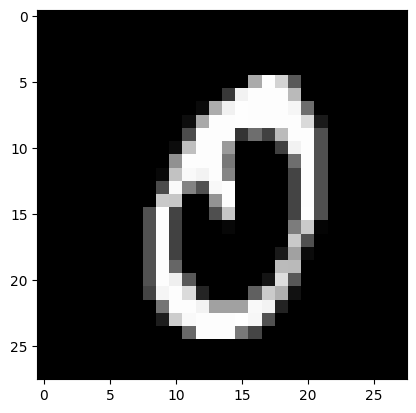

In [84]:
plt.imshow(x_test.values[128].reshape(28,28),cmap='gray')

In [87]:
print(model.predict(x_test.values[128].reshape(1,784)))
pred=(np.argmax(model.predict(x_test.values[128].reshape(1,784))))
print("Value Predicted by the model is: ",pred)

1/1 [==============================] - 0s 17ms/step
[[9.9958044e-01 3.8055867e-02 4.2979234e-01 9.3944556e-01 5.2961317e-05
  9.6061248e-01 4.4107497e-02 3.6261734e-02 9.9359387e-01 7.8290933e-01]]
1/1 [==============================] - 0s 17ms/step
Value Predicted by the model is:  0


In [89]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0755 - accuracy: 0.9805
[0.0754779502749443, 0.9804762005805969]
263/263 [==============================] - 1s 2ms/step - loss: 0.1199 - accuracy: 0.9642
[0.1198689192533493, 0.9641666412353516]
